We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012:

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

* Rank - Rank by median earnings (the dataset is ordered by this column).
* Major_code - Major code.
* Major - Major description.
* Major_category - Category of major.
* Total - Total number of people with major.
* Sample_size - Sample size (unweighted) of full-time.
* Men - Male graduates.
* Women - Female graduates.
* ShareWomen - Women as share of total.
* Employed - Number employed.
* Median - Median salary of full-time, year-round workers.
* Low_wage_jobs - Number in low-wage service jobs.
* Full_time - Number employed 35 hours or more.
* Part_time - Number employed less than 35 hours.

Using visualizations, we can start to explore questions from the dataset like:

* Do students in more popular majors make more money?
Using scatter plots
* How many majors are predominantly male? Predominantly female?
Using histograms
* Which category of majors have the most students?
Using bar plots

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
recent_grads=pd.read_csv("recent-grads.csv")
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [6]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [7]:
recent_grads.dropna()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.144967,17,1857,...,264,1449,400,0.177226,65000,50000,102000,1142,657,244
6,7,6202,ACTUARIAL SCIENCE,3777.0,2110.0,1667.0,Business,0.441356,51,2912,...,296,2482,308,0.095652,62000,53000,72000,1768,314,259
7,8,5001,ASTRONOMY AND ASTROPHYSICS,1792.0,832.0,960.0,Physical Sciences,0.535714,10,1526,...,553,827,33,0.021167,62000,31500,109000,972,500,220
8,9,2414,MECHANICAL ENGINEERING,91227.0,80320.0,10907.0,Engineering,0.119559,1029,76442,...,13101,54639,4650,0.057342,60000,48000,70000,52844,16384,3253
9,10,2408,ELECTRICAL ENGINEERING,81527.0,65511.0,16016.0,Engineering,0.196450,631,61928,...,12695,41413,3895,0.059174,60000,45000,72000,45829,10874,3170


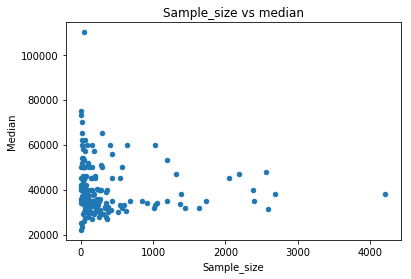

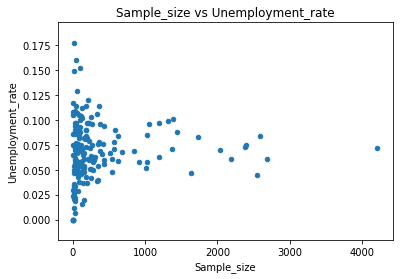

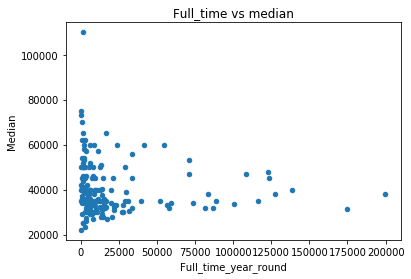

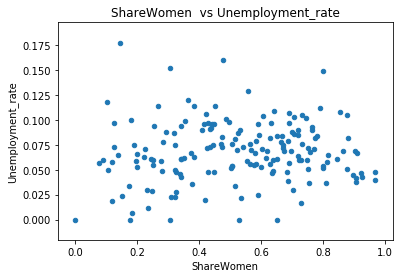

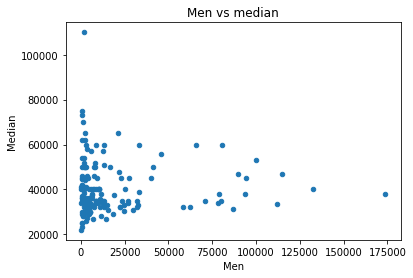

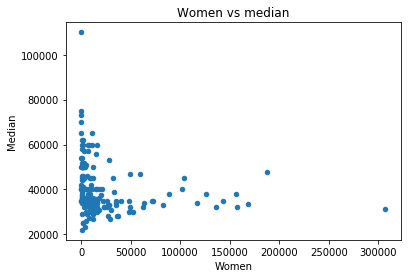

In [11]:
ax1=recent_grads.plot(x="Sample_size",y="Median",kind="scatter", title="Sample_size vs median")
ax2=recent_grads.plot(x="Sample_size",y="Unemployment_rate",kind="scatter", title="Sample_size vs Unemployment_rate")
ax3=recent_grads.plot(x="Full_time_year_round",y="Median",kind="scatter", title="Full_time vs median")
ax4=recent_grads.plot(x="ShareWomen",y="Unemployment_rate",kind="scatter", title="ShareWomen  vs Unemployment_rate")
ax5=recent_grads.plot(x="Men",y="Median",kind="scatter", title="Men vs median")
ax6=recent_grads.plot(x="Women",y="Median",kind="scatter", title="Women vs median")
plt.show()

We can use this plots to explore the following questions:
* Do students in more popular majors make more money?
* Do students that majored in subjects that were majority female make more money?
* Is there any link between the number of full-time employees and median salary?

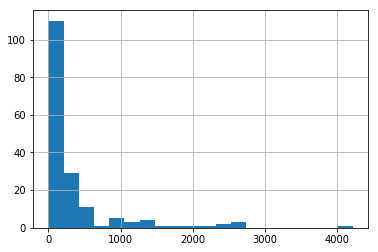

In [34]:
recent_grads['Sample_size'].hist(bins=20, range=(0,recent_grads['Sample_size'].max()))

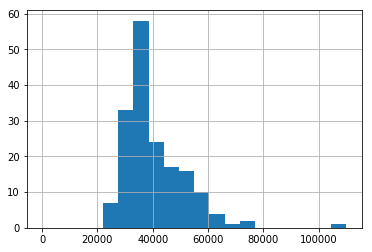

In [33]:
recent_grads['Median'].hist(bins=20, range=(0,recent_grads['Median'].max()))

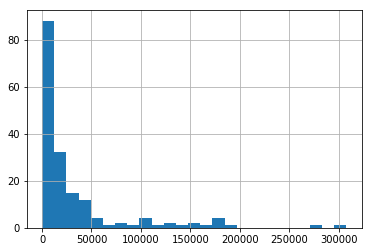

In [39]:
recent_grads['Employed'].hist(bins=25, range=(0,recent_grads['Employed'].max()))

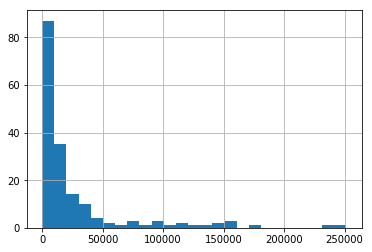

In [40]:
recent_grads['Full_time'].hist(bins=25, range=(0,recent_grads['Full_time'].max()))

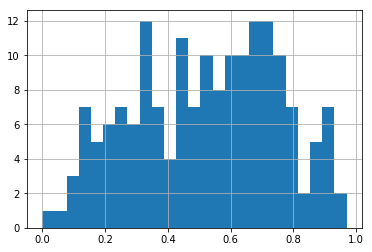

In [41]:
recent_grads['ShareWomen'].hist(bins=25, range=(0,recent_grads['ShareWomen'].max()))

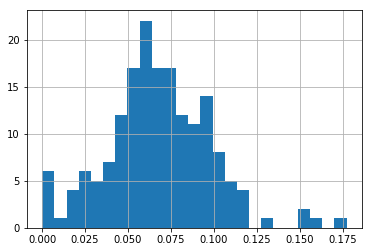

In [42]:
recent_grads['Unemployment_rate'].hist(bins=25, range=(0,recent_grads['Unemployment_rate'].max()))

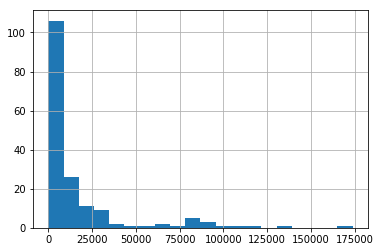

In [45]:
recent_grads['Men'].hist(bins=20, range=(0,recent_grads['Men'].max()))

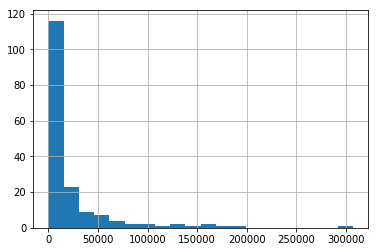

In [46]:
recent_grads['Women'].hist(bins=20, range=(0,recent_grads['Women'].max()))

Use the plots to explore the following questions:
* What percent of majors are predominantly male? Predominantly female?
* What's the most common median salary range?

# A scatter matrix plot using scatter_matrix() function:

**A scatter matrix plot** combines both scatter plots and histograms into one grid of plots and allows us to explore potential relationships and distributions simultaneously. A scatter matrix plot consists of n by n plots on a grid, where n is the number of columns, the plots on the diagonal are histograms, and the non-diagonal plots are scatter plots.

In [70]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000243C57051D0>,
      dtype=object)

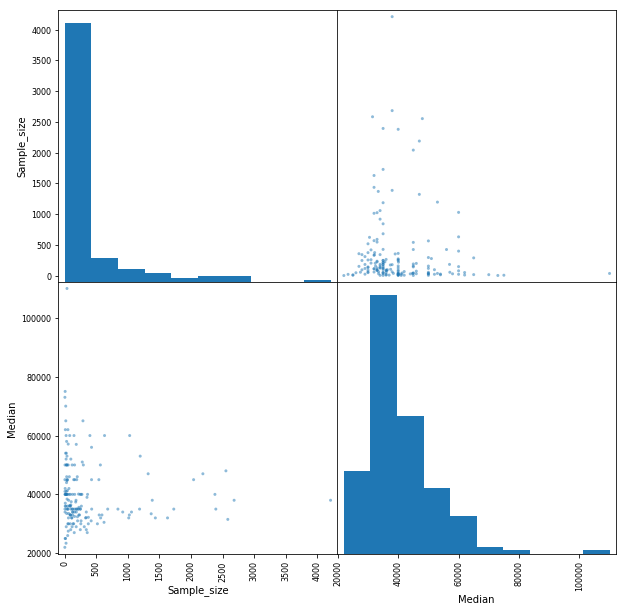

In [71]:
scatter_matrix(recent_grads[["Sample_size","Median"]], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000243C5B059B0>,
      dtype=object)

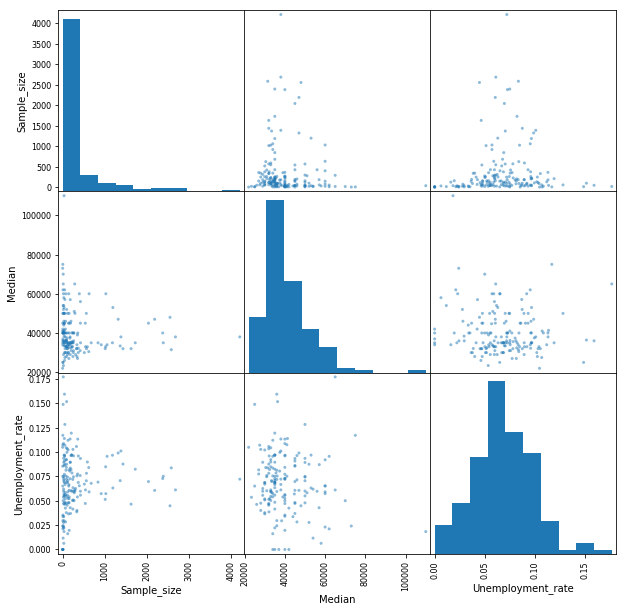

In [72]:
scatter_matrix(recent_grads[["Sample_size","Median","Unemployment_rate"]], figsize=(10,10))

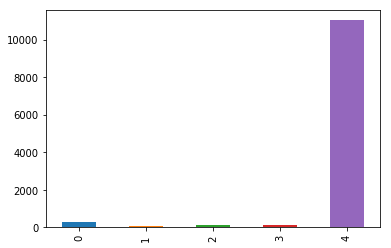

In [53]:
recent_grads[:5]['Women'].plot(kind='bar')

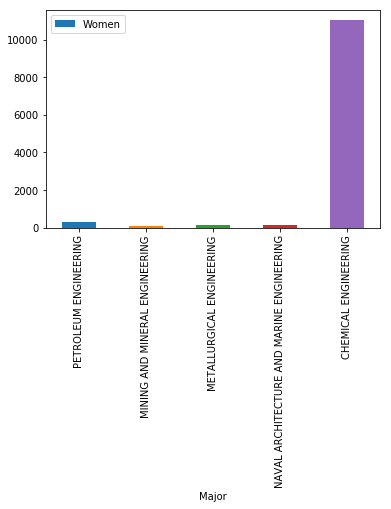

In [54]:
recent_grads[:5].plot.bar(x='Major', y='Women')

* Use bar plots to compare the percentages of women (ShareWomen) from the first 10 rows and last 10 rows of a sorted dataframe.

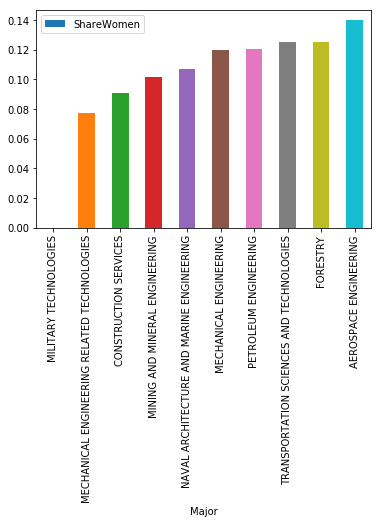

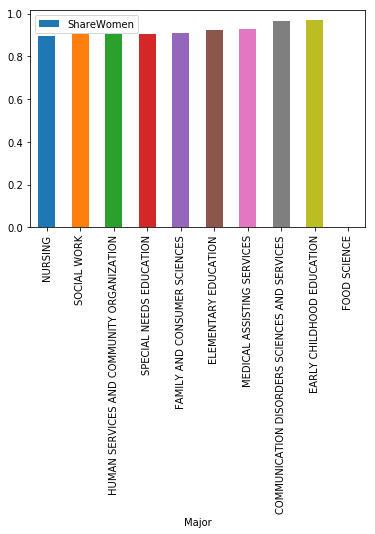

In [73]:
sorted_df=recent_grads.sort_values(["ShareWomen"])
sorted_df[:10].plot.bar(x='Major',y="ShareWomen")
sorted_df[-10:].plot.bar(x='Major',y="ShareWomen")

* Use bar plots to compare the unemployment rate (Unemployment_rate) from the first 10 rows and last 10 rows of a sorted dataframe.

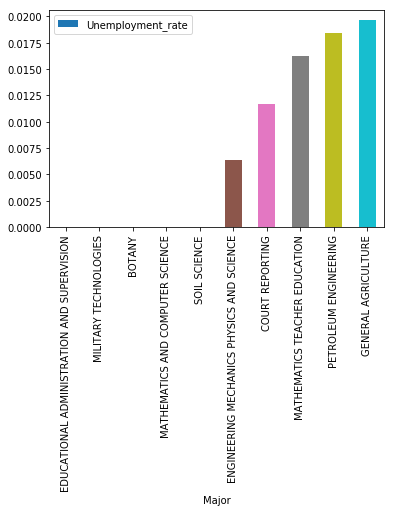

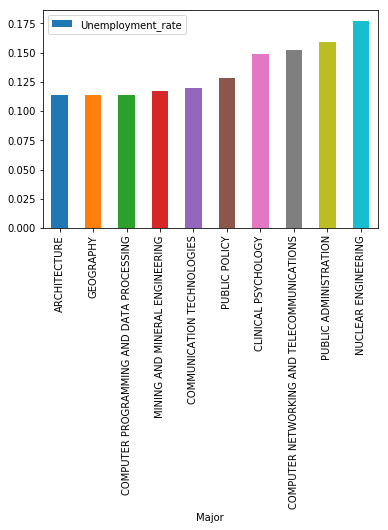

In [74]:
unemploymentRate_sorted=recent_grads.sort_values(["Unemployment_rate"])
unemploymentRate_sorted[:10].plot.bar(x="Major",y="Unemployment_rate")
unemploymentRate_sorted[-10:].plot.bar(x="Major",y="Unemployment_rate")